#Matplotlib, seaborn и др.

In [ ]:
# библиотеки и импорты разом (новые):
!pip install matplotlib
!pip install seaborn
# % для VS Code

import pandas as pd
import matplotlib.pyplot as plt # традиционное сокращение
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
# здесь пакет всего и сразу, чтобы практику сделать в этой тетрадке, а не в отдельной

!pip install pymorphy3 # для Colab
import nltk
from nltk.tokenize import word_tokenize
from nltk import download # для Colab
download('punkt_tab') # для Colab
download('stopwords') # для Colab
from nltk.corpus import stopwords
stop_words = stopwords.words('russian') + ['это', 'всё', 'свой', 'весь', 'вроде']
from collections import Counter
import pymorphy3
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()
from pymystem3 import Mystem
mystem = Mystem()

def lemm_pymorphy(text):
  text_list_nltk = word_tokenize(text.lower())
  text_clean = [word for word in text_list_nltk if word not in stop_words and word[0].isalpha()]
  lemm = [morph.parse(word)[0].normal_form for word in text_clean]
  return lemm

def lemm_mystem(text):
  lemm = mystem.lemmatize(text)
  lemm_clean = [word for word in lemm if word not in stop_words and word[0].isalpha()]
  return lemm_clean

## Matplotlib

Matplotlib -- это одна из классических библиотек для визуализации данных в Python


In [ ]:
# !pip install matplotlib # ячейка установки библиотеки в первый раз

Визуализации в MatPlotLib обычно делают с помощью `pyplot`
— специального объекта, методы которого позволяют создавать и изменять графики. Импортируем его:

In [ ]:
import matplotlib.pyplot as plt # традиционное сокращение
import pandas as pd

## Датасет

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Python_CL_2024/refs/heads/main/data/cases_regions_2022-02-03.csv', sep=';')
covid

In [ ]:
covid['Москва'][660:691] #январь 2022

In [ ]:
plt.plot(covid['Москва'][660:691]) # plot - линейный график
plt.show()

In [ ]:
plt.plot(covid['Москва'][660:691]); # ; == plt.show()
# можно не писать plt.show(), а сразу заканчивать график знаком ;

In [ ]:
plt.plot(covid['Москва'][660:691]) #plot - линейный график
plt.savefig('my_covid_plot') # создаст png

In [ ]:
plt.plot(
    [f'{i}' for i in range(1, 32)], # сгенерируем подписи по оси x
    covid['Москва'][660:691] # ось Y
    )
plt.show()

Данные расположились по оси y

Добавим красивые подписи по оси х: отобразить подписи вертикально внутри .plot нельзя. Для этого есть отдельный метод под названием xticks:

In [ ]:
plt.plot(
    [f'{i} янв' for i in range(1, 32)], # ось X с подписями
    covid['Москва'][660:691] # ось Y
    )
plt.xticks(rotation=90) # показать подписи вертикально = под углом 90 градусов
plt.show()

In [ ]:
plt.plot(
    [f'{i} января' for i in range(1, 32)], # ось X
    covid['Москва'][660:691] # ось Y
    )
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.plot(
    [f'{i} янв' for i in range(1, 32)], # ось X
    covid['Москва'][660:691], # ось Y
    marker='o' # через запятую добавлели маркеры - точки
    )
plt.xticks(rotation=90)
plt.show()

In [ ]:
# запись можно сократить и упростить

x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

plt.plot(x, y, marker='o')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# сравним:

x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

plt.plot(x, y, 'o') # точки, без линии
plt.xticks(rotation=90)
plt.show()

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

plt.plot(x, y, 'ro') # угадайте, что значит ro?
plt.xticks(rotation=90)
plt.show()

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

plt.plot(x, y, 'g^')
plt.xticks(rotation=90)
plt.show()

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

plt.plot(x, y, marker = 's', linestyle = ':', color = 'orange')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import matplotlib.ticker as ticker
# здесь: https://matplotlib.org/stable/api/ticker_api.html

x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

fig, ax = plt.subplots()
ax.plot(x, y, color = 'r', linewidth = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # Код для установки размера тиков (шагов)
plt.xticks(rotation=45)
plt.show()

Вот [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) описаны все варианты задания цветов, точек и формы штриха.

### Размер холста через pyplot

можно вызвать метод figure и задать размер через него:

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

plt.figure(figsize=(10, 5)) # указываем размер в дюймах
plt.plot(x, y, marker = 's', linestyle = ':', color = 'orange')
plt.xticks(rotation=90)
plt.show()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

## Отобразим несколько показателей

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]

y1 = covid['Москва'][660:691]
y2 = covid['Санкт-Петербург'][660:691]
y3 = covid['Пермский край'][660:691]

plt.figure(figsize=(12,8))
plt.plot(x, y1, '.') # Москва
plt.plot(x, y2, '^')
plt.plot(x, y3, 's')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# можно использовать короткую запись

x = [f'{i} янв' for i in range(1, 32)]

y1 = covid['Москва'][660:691]
y2 = covid['Санкт-Петербург'][660:691]
y3 = covid['Пермский край'][660:691]

plt.figure(figsize=(12,8))
plt.plot(x, y1, '.',
         x, y2, '^',
         x, y3, 's') # легко запутаться
plt.xticks(rotation=90)
plt.show()

In [ ]:
# можно использовать короткую запись

x = [f'{i} янв' for i in range(1, 32)]

y1 = covid['Москва'][660:691]
y2 = covid['Санкт-Петербург'][660:691]
y3 = covid['Пермский край'][660:691]

plt.figure(figsize=(12,8))
plt.plot(x, y1, '.', x, y2, '^', x, y3, 's')
plt.xticks(rotation=90)
plt.grid() # задает сетку на графике: сетка привязана к тикам по оси x и y
plt.show()

Добавим легенду

In [ ]:
# можно использовать короткую запись

x = [f'{i} янв' for i in range(1, 32)]

y1 = covid['Москва'][660:691]
y2 = covid['Санкт-Петербург'][660:691]
y3 = covid['Пермский край'][660:691]

plt.figure(figsize=(12,8))
plt.plot(x, y1, '.', x, y2, '^', x, y3, 's')
plt.xticks(rotation=90)
plt.grid()
plt.legend(['Москва', 'Санкт-Петербург', 'Пермь']) # но создатели библиотеки рекомендуют другой способ
plt.show()

# можно почитать здесь https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]

y1 = covid['Москва'][660:691]
y2 = covid['Санкт-Петербург'][660:691]
y3 = covid['Пермский край'][660:691]

plt.figure(figsize=(10,6))
plt.plot(x, y1, '.', label='Москва')
plt.plot(x, y2, '^', label='Санкт-Петербург')
plt.plot(x, y3, 's', label='Пермь')
plt.xticks(rotation=90)
plt.grid()
plt.legend() # legend сама добавит значения из label
plt.show()

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]

y1 = covid['Москва'][660:691]
y2 = covid['Санкт-Петербург'][660:691]
y3 = covid['Пермский край'][660:691]

plt.figure(figsize=(10,6))

# заголовок и его стили
plt.title('Статистика по ковиду для Москвы и Санкт-Петербурга и Перми', fontsize=16, color='green', fontstyle='italic', fontfamily='serif')

plt.plot(x, y1, '.', label='Москва')
plt.plot(x, y2, '^', label='Санкт-Петербург')
plt.plot(x, y3, 's', label='Пермь')

# подписи осей
plt.xticks(rotation=90, fontsize=16) # вертикально
plt.xlabel('Дни', fontsize=16)
plt.ylabel('Заражения в день', fontsize=16)

plt.legend(fontsize=16)
plt.grid()
plt.show()

Методы пайплота, которые отвечают за текст на графиках ([см.тут](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text))

In [ ]:
# построим финальный график, со всеми подписями и шагом для обеих осей
# import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Статистика по ковиду для Москвы и Санкт-Петербурга и Перми', fontsize=16, color='green', fontstyle='italic', fontfamily='serif')
plt.plot(x, y1, '.', x, y2, '^', x, y3, 's')
ax.plot([f'{i} янв' for i in range(1, 32)], covid['Москва'][660:691], '.', label='Москва')
ax.plot([f'{i} янв' for i in range(1, 32)], covid['Санкт-Петербург'][660:691], '^', label='Санкт-Петербург')
ax.plot([f'{i} янв' for i in range(1, 32)], covid['Пермский край'][660:691], 's', label='Пермский край')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2)) # шаг на оси x - 2
ax.yaxis.set_major_locator(ticker.MultipleLocator(6000)) # шаг на оси x - 6000

# подписи осей
plt.xticks(rotation=90, fontsize=16) # вертикально
plt.yticks(fontsize=16)
plt.xlabel('Дни', fontsize=16)
plt.ylabel('Заражения в день', fontsize=16)

plt.legend(fontsize=16)

plt.grid() # задает сетку на графике (сетка привязана к интервалу на осях!)
# меняем шаг -> изменится и сетка
plt.show()

# https://matplotlib.org/stable/api/gridspec_api.html

# Задание

Постройте график для любых 2 субъектов (кроме Москвы, Санкт-Петербурга и Пермского края)

Можно выбрать из датафрейма не январь

У графика должны быть заголовок, подписи, названия осей и легенда

In [ ]:
# ваш код



## Другие типы графиков matplotlib

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]
y1 = covid['Москва'][660:691]

plt.bar(x, y1) # бар-чарт, столбики
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.hist(covid['Москва'][660:691]) # гистограмма, ось x
plt.show()

In [ ]:
plt.hist(covid['Москва'][660:691], bins=20) # количество столбцов (=диапазонов) можно задать
plt.show()
# y - частоты

In [ ]:
# pie - круговая диаграмма, на наших данных в таком виде - полная ерунда
plt.pie(covid['Москва'][660:691], labels=[f'{i} янв' for i in range(1, 32)])
plt.show()

In [ ]:
# сделаем прилично: переведем дату в правильный пандасовский формат
covid['DateTime'] = pd.to_datetime(covid['DateTime'], format='%Y-%m-%d %H:%M:%S')

# посмотрим на годы:
covid['DateTime'].dt.year

In [ ]:
# посчитаем, за какие годы у нас есть данные
print(covid['DateTime'].dt.year.value_counts())
print(covid['DateTime'].dt.year.value_counts().index)

In [ ]:
plt.pie(covid['DateTime'].dt.year.value_counts(),
        labels=covid['DateTime'].dt.year.value_counts().index)
plt.show()

Датавиз-сообщества считают, что pie-chart'ы устарели! :)

![мем.jpg](https://qph.cf2.quoracdn.net/main-qimg-6ade42a13909e5488b4474dc150c0701-lq)

За картинку спасибо @Andre_Orlov!)

[Веселое обсуждение](https://medium.com/@eolay13/визуализируем-кофе-молоко-и-сахар-68fc7079868c) в тему - это Medium, откроется только с vpn


### Задание 1



In [ ]:
# 1.1

with open('Чехов.txt', encoding='utf-8') as f:
  text = f.read()

# топ 50-слов со стоп-словами
top50 = Counter([word for word in mystem.lemmatize(text) if word[0].isalpha()]).most_common(50)
df = pd.DataFrame(top50, columns=['слово', 'частота'])
df.index = df['слово'] # удобно брать подписи из индексов df
df['частота'].sort_values(ascending=False)

In [ ]:
plt.plot(df['частота'].sort_values(ascending=False));

Сделайте этот график приличным:
- растяните холст по горизонтали;
- расположите пописи по оси х так, чтобы стало читаемо

In [ ]:
# ваш код




Внесите изменения в код так, чтобы получить топ-50 частотных лемм (вспомните, что у вас в коде среди импортов была готовая функция по лемматизации - `lemm_pymorphy` или `lem_mystem` (на ваш выбор)


In [ ]:
top50 = Counter([word for word in mystem.lemmatize(text) if word[0].isalpha()]).most_common(50) # здесь нужно что-то поменять

df = pd.DataFrame(top50, columns=['лемма', 'частота'])
df.index = df['лемма']
df['частота'].sort_values(ascending=False)

In [ ]:
# затем снова постройте приличный график
# можно скопировать из вашего кода выше



Пример бар-чарта на этих данных (взяла 10 слов, чтобы стало красивее)


In [ ]:
# будьте внимательны с бар-чартами, им нужны явно заданные подписи оси х
plt.figure(figsize=(10, 5))
plt.bar(df['частота'].sort_values(ascending=False)[:10].index,
        df['частота'].sort_values(ascending=False)[:10]);

Переделайте этот график в круговой (пай-чарт)


In [ ]:
# ваш код




Ниже возможные ответы:

In [ ]:
# @title
# минимально приличный график
plt.figure(figsize=(10, 4))
plt.plot(df['частота'].sort_values(ascending=False))
plt.xticks(rotation=90);

In [ ]:
# @title
# вносим изменения в код
top50 = Counter(lemm_pymorphy(text)).most_common(50)
# или:
# top50 = Counter(lemm_mystem(text)).most_common(50)

df = pd.DataFrame(top50, columns=['лемма', 'частота'])
df.index = df['лемма']
df['частота'].sort_values(ascending=False)

# строим график:
plt.figure(figsize=(10, 4))
plt.plot(df['частота'].sort_values(ascending=False))
plt.xticks(rotation=90);

In [ ]:
# @title
# пай-чарт
plt.pie(df['частота'].sort_values(ascending=False)[:10],
        labels=df['частота'].sort_values(ascending=False)[:10].index);

### Задание 2

Добавляем частеречную разметку

In [ ]:
def pos_pymorphy(word):
  return morph.parse(word)[0].tag.POS

def pos_mystem(word):
  try:
    return mystem.analyze(word)[0]['analysis'][0]['gr'][0]
  except: # там у меня где-то выскочила ошибка, лень искать и исправлять -> заменим на None
    None

df = pd.DataFrame(lemm_mystem(text), columns=['слово'])
df['pymorphy'] = df['слово'].apply(pos_pymorphy)
df['mystem'] = df['слово'].apply(pos_mystem)
df

- создайте частотные таблицы с помощью `df[столбец].value_counts()` для pymorphy и mystem

- постройте бар-чарты (столбчатые диаграммы) для граммем pymorphy и mystem с помощью `plt.bar()`

In [ ]:
# pymorphy



In [ ]:
# mystem



- переделайте эти графики в пай-плоты

In [ ]:
# pymorphy



In [ ]:
# mystem



Возможные ответы:

In [ ]:
# @title
plt.figure(figsize=(10, 5))
plt.bar(df['pymorphy'].value_counts().index,
        df['pymorphy'].value_counts());

In [ ]:
# @title
plt.figure(figsize=(10, 5))
plt.bar(df['mystem'].value_counts().index,
        df['mystem'].value_counts());

In [ ]:
# @title
plt.pie(df['pymorphy'].value_counts(),
        labels=df['pymorphy'].value_counts().index,
        autopct='%1.1f%%'); # на паре не смотрели, но можно еще вывести проценты

In [ ]:
# @title
plt.pie(df['mystem'].value_counts(),
        labels=df['mystem'].value_counts().index,
        autopct='%1.1f%%');

Как делать пай-чарты не такими ужасными?))

In [ ]:
# всегда хочется срезать только частотные категории, но это будет некорректно - их доли изменяется

df['pymorphy'].value_counts()

In [ ]:
# отфильтруем сроки со значением больше 1000
# потом сохраним в новую таблицу

mini = df['pymorphy'].value_counts()
res = mini[mini > 1000]
other = mini[mini <= 1000].sum() # создадим категорию Другие = посчитаем, сколько значений мы потеряли при фильтрации
res = pd.concat([res, pd.Series(other, index=['Другие'], name='count')]) # объдиняем нужные значения + другие
plt.pie(res, autopct='%.2f', labels = res.index);

In [ ]:
# или:
# просто создадим для этого новый столбец в датафрейме

top_pos = list(df['pymorphy'].value_counts()[:5].index)

def f(n):
  if n not in top_pos:
    return 'Другие'
  else:
    return n

df['pymorphy_coded'] = df['pymorphy'].apply(f)

plt.pie(df['pymorphy_coded'].value_counts(), autopct='%.2f', labels = df['pymorphy_coded'].value_counts().index) =;

А теперь давайте попробуем рисовать при помощи функции scatter, которая работает несколько медленнее, но обладает большей функциональностью ([см. здесь](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)).

Так как scatter по определению - это набор точек, которые не должны соединяться между собой, а просто бросаются на плоскость, то отрисовать линию с его помощью не получится.

Параметр alpha можно применять почти везде. Он показывает степень прозрачности графика, легенды (0 = полностью прозрачен; 1 = абсолютно непрозрачен)

Помимо этого для каждой из точек можно задавать размер маркера (параметр s, size) и его цвет (параметр c, colour).

In [ ]:
x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

c = 'green'

s = [i * 0.1 for i in y] # 0.1 - просто чтобы красиво отобразить именно эти данные, у нас достаточно большие числа
#s = 100 # размер можно сделать статичным

plt.scatter(x, y, c = c, s = s, alpha = 0.3) # попробуйте поменять параметр alpha

plt.xticks(rotation=90)
plt.show()

Цвет графика можно задать при помощи цветовой карты. Для использования стандартных цветовых карт необходимо загрузить их из matplotlib:
from matplotlib import cm

Ту, что больше нравится, стоит присвоить в параметр cmap

А здесь [ссылка с описанием и названиями цветовых карт](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

In [ ]:
from matplotlib import cm

x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

c = y # нужен список, чтобы для разных точек сгенерировать разные цвета!
s = [i * 0.1 for i in y]

plt.scatter(x, y, c = c, s = s, alpha=0.5, cmap=cm.magma)

plt.xticks(rotation=90)
plt.show()

In [ ]:
# можно также строить облако точек для поиска зависимости между разными показателями
plt.scatter(x = covid['Москва'], y = covid['Санкт-Петербург'])
plt.show()
# для наших данных - не очень интересно, хотя смысл все же есть:
# заболеваемость в Москве и Петербурге связаны - общие волны ковида, очевидно, сильно прокатились по крупным городам

Я оставила вам в конце этой тетрадки ссылку на такой вариант визуализации, но в двух словах идея такая:

Нам нужно два количественных показателя, чтобы мы могли построить такой график

Но что, если взять несколько текстов, посчитать tf-idf (думаю, что на теме векторные модели в КЛ вы еще об этом поговорите) и наложить на график?

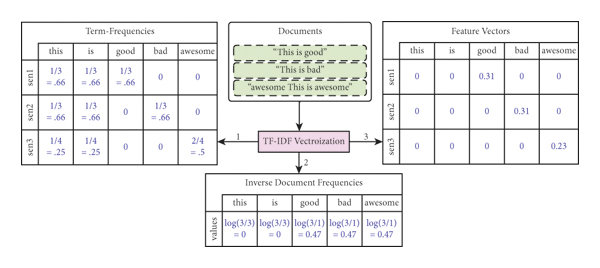

### Бонус с использованием tf-idf к сравнению текстов

In [ ]:
with open('По причине души.txt', encoding='utf-8') as f:
  text2 = f.read()

with open('Краснов.txt', encoding='utf-8') as f:
  text3 = f.read()

corpus = [text, text2, text3]
clean_corpus = [' '.join(lemm_pymorphy(i)) for i in corpus] # будем использовать чистые тексты

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(clean_corpus)
words = tfidf_vectorizer.get_feature_names_out()
data = tfidf.todense().tolist()
keywords = pd.DataFrame(data, columns = words)

In [ ]:
res = keywords.T
res.columns = ['Чехов', 'Краснов_По причине души', 'Краснов_Новомир']
res

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_По причине души'], res['Краснов_Новомир'])
plt.xlabel('Краснов_По причине души', fontsize=12)
plt.ylabel('Краснов_Новомир', fontsize=12);

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_По причине души'], res['Чехов'])
plt.xlabel('Краснов_По причине души', fontsize=12)
plt.ylabel('Чехов', fontsize=12);

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_Новомир'], res['Чехов'])
plt.xlabel('Краснов_Новомир', fontsize=12)
plt.ylabel('Чехов', fontsize=12);

Забавно, но ничего непонятно: какие слова все-таки отличают тексты в большей степени?

Добавим наложение подписей к точкам, но! уникальных слов - более 30 тыс., подписывать каждое не будем (иначе график будет строиться долго...)

In [ ]:
mini = res.sort_values(by=['Чехов', 'Краснов_Новомир'], ascending=False)[:100] # срез

plt.figure(figsize=(10, 5))
plt.scatter(mini['Краснов_Новомир'], mini['Чехов'])

for x_coord, y_coord, label in zip(mini['Краснов_Новомир'], mini['Чехов'], mini.index):
    plt.text(x_coord, y_coord, label)

plt.xlabel('Краснов_Новомир', fontsize=12)
plt.ylabel('Чехов', fontsize=12);

In [ ]:
mini = res.sort_values(by=['Краснов_По причине души', 'Краснов_Новомир'], ascending=False)[:100]

plt.figure(figsize=(10, 5))
plt.scatter(mini['Краснов_Новомир'], mini['Краснов_По причине души'])

for x_coord, y_coord, label in zip(mini['Краснов_Новомир'], mini['Краснов_По причине души'], mini.index):
    plt.text(x_coord, y_coord, label)

plt.xlabel('Краснов_Новомир', fontsize=12)
plt.ylabel('Краснов_По причине души', fontsize=12);

Графики немножко искажаются из-а сортировки

можно так поступить вообще со всеми словами, но строиться будет значительно дольше (2-3 минуты), запускайте на свой страх и риск))

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_По причине души'], res['Чехов'])

for x_coord, y_coord, label in zip(res['Краснов_По причине души'], res['Чехов'], res.index):
    plt.text(x_coord, y_coord, label)

plt.xlabel('Краснов_По причине души', fontsize=12)
plt.ylabel('Чехов', fontsize=12);

## А если наши данные - категориальные?

Иногда мы имеем дело с данными, которые выражены не числами.

Предположим, имя и возраст человека:

In [ ]:
data = {'Paul' : 68, 'Jane' : 25, "Diana" : 102}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1,3, figsize=(10, 3)) # subplots - позволяет строить несколько графиков рядом, в т.ч. графики разных типов

axs[0].plot(names, values, "b--")
axs[1].scatter(names, values, s = [i * 10 for i in values], alpha=0.5, color = "green")
axs[2].bar(names, values, color = "pink")

fig.suptitle('Categorical Plotting')
plt.show()

См.разные типы графиков [здесь](https://matplotlib.org/stable/plot_types/index.html)

Также от моих коллег - подборка разных ресурсов для вдохновения:

- https://www.data-to-viz.com/ (+ Python / R)

- https://datavizcatalogue.com/RU/

- https://datavizproject.com/


# Seaborn

Простые графики можно строить в matplotlib (а еще он отлично интергрирован с pandas), но работать категориальными данными удобнее в seaborn

Seaborn — это более новая надстройка над matplotlib, которая заметно проще и "сразу делает красиво". Документация [здесь](https://seaborn.pydata.org)


In [ ]:
# !pip install seaborn

In [ ]:
# import seaborn as sns

### Важно!
Seaborn очень любит датафреймы - просто список ``x = [f'{i} янв' for i in range(1, 32)]`` он больше не ест


In [ ]:
# сделаем мини-датафрейм
x = [f'{i} янв' for i in range(1, 32)]
y = covid['Москва'][660:691]

df = pd.DataFrame([x, y]).T
df.columns=['Date', 'Number of cases']
df

In [ ]:
sns.lineplot(x = 'Date', y = 'Number of cases', data=df);

In [ ]:
sns.lineplot(x = 'Date', y = 'Number of cases', data=df)
plt.xticks(rotation=90)
plt.show() # матплотлибовские настройки тоже обычно работают

In [ ]:
city = covid[['Москва','Санкт-Петербург']] # возьмем все данные по ковиду в М и СПб
city

In [ ]:
sns.lineplot(data = city)
plt.show()
# выглядит просто и красиво! Но мы теряем подписи оси x - у нашем датасете нет готовых

В seaborn есть несколько известных датасетов. Можно скачать [отсюда](https://github.com/mwaskom/seaborn-data), если не откроются через load_dataset(), встроенный в библиотеку

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

In [ ]:
# если команды выше не сработали
# датасеты можно передать в pandas прямо с гитхаба по raw-ссылке:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tips

Давайте визуализируем распределения общего счета по дням недели. Для визуализации потребуется метод .catplot() Заголовки соответвующих ячеек присвоим аргументам x и y.

Тип отображения (параметр kind) тоже можно менять (попробуйте "point", "bar", "strip", "swarm", "box", "violin" или "boxen")

In [ ]:
sns.catplot(x = "day", y = "total_bill", kind= "point", data = tips)
plt.show()

Можно достаточно легко и быстро отобразить на графике несколько показателей:

Ниже - распределение значений итогового счета(ось y) в зависимости от пола (ось x). Дополнительно цветом (параметр hue) можно закодировать еще одно значение с помощью цвета

In [ ]:
sns.catplot(x = "sex", y = "total_bill", hue = "smoker", kind = "bar", data = tips)
plt.show()

In [ ]:
# так выглядит распределение размера счета и чаевых
sns.catplot(x = "total_bill", y = "tip", kind = "strip", hue='sex', data=tips)
plt.show()
# не самая удачная визуализация, еще и долго строится (ожидались категориальные данные, а у нас количественные) - есть решение лучше

In [ ]:
# jointplot - показывает распределение по 2 количественным переменным + в hue можно добавить категориальные данные
sns.jointplot(x ='total_bill', y = 'tip', hue = 'sex', data = tips)
plt.show()

In [ ]:
# можно строить линейную регрессию (для определения зависимости двух показателей, рассчитывается функция линейной зависимости)
sns.lmplot(x ='total_bill', y = 'tip', data = tips)
plt.show()

In [ ]:
# заодно проверим, меняются ли счет / чаевые в связи со временем посещения - в обед или ужин
sns.lmplot(x ='total_bill', y = 'tip', hue = 'time', data = tips)
plt.show()

### Несколько примеров работы с текстами:
1. Визуализация данных [с помощью matplotlib и NLTK](https://python-bloggers.com/2023/04/visualizing-text-data/) (вы можете улучшить! как минимум, на этапе очистки текста)

2. Topic Modeling от Д. Скоринкина: [тетрадка](https://colab.research.google.com/drive/1a_3_lQtI0HmaLNlouMsNjIImCP8LVFHg?usp=sharing) (важно! gensim больше не поддерживает этот модуль, так что инструкция несколько устаревшая - насколько я помню, для рисования такого графика нужно поставить старую версию pandas прямо перед тем, как отрисовать график - лучше экспериментировать в Colab)
3. Прекрасная библиотека scattertext: [гитхаб](https://github.com/JasonKessler/scattertext) авторов проекта

### Дополнительно:

Список телеграм-каналов по анализу данных и датавизу, которые читаю я, здесь:

https://t.me/naukaidannye

https://t.me/chartomojka

https://t.me/nastengraph

https://t.me/data_publication

https://t.me/dashboardets

https://t.me/callmedata

https://t.me/designing_numbers

https://t.me/weekly_charts
